In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.MOTION_SENSE)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-01-04 21:18:30,295 - whar-datasets - INFO - Running DownloadingStep
2026-01-04 21:18:30,295 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-01-04 21:18:30,297 - whar-datasets - INFO - Hash is up to date
2026-01-04 21:18:30,297 - whar-datasets - INFO - Forcing recompute
2026-01-04 21:18:30,297 - whar-datasets - INFO - Running ParsingStep
2026-01-04 21:18:30,297 - whar-datasets - INFO - Checking hash for ParsingStep
2026-01-04 21:18:30,298 - whar-datasets - INFO - Hash is up to date
2026-01-04 21:18:30,298 - whar-datasets - INFO - Checking download
2026-01-04 21:18:30,298 - whar-datasets - INFO - Download exists
2026-01-04 21:18:30,299 - whar-datasets - INFO - Parsing to common format
Creating sessions: 100%|██████████| 360/360 [00:01<00:00, 226.98it/s]
2026-01-04 21:18:35,390 - whar-datasets - INFO - Saving common format
2026-01-04 21:18:36,040 - whar-datasets - INFO - Forcing recompute
2026-01-04 21:18:36,041 - whar-datasets - INFO - Running WindowingStep
2026-01-0

[########################################] | 100% Completed | 2.21 sms


2026-01-04 21:18:38,506 - whar-datasets - INFO - Common format validated.
2026-01-04 21:18:38,507 - whar-datasets - INFO - Compute windowing
2026-01-04 21:18:38,507 - whar-datasets - INFO - Selecting activities


[########################################] | 100% Completed | 9.13 sms


2026-01-04 21:18:47,907 - whar-datasets - INFO - Saving windowing
2026-01-04 21:18:55,323 - whar-datasets - INFO - Loading windowing
2026-01-04 21:18:55,332 - whar-datasets - INFO - activity_ids from 0 to 5
2026-01-04 21:18:55,332 - whar-datasets - INFO - subject_ids from 0 to 23


In [4]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 16576 4144 808
subject_1 16464 4115 949
subject_2 16601 4150 777
subject_3 16500 4125 903
subject_4 16461 4115 952
subject_5 16458 4114 956
subject_6 16493 4123 912
subject_7 16535 4133 860
subject_8 16474 4118 936
subject_9 16525 4131 872
subject_10 16498 4124 906
subject_11 16547 4136 845
subject_12 16540 4134 854
subject_13 16587 4146 795
subject_14 16424 4105 999
subject_15 16482 4120 926
subject_16 16527 4131 870
subject_17 16456 4113 959
subject_18 16604 4151 773
subject_19 16343 4085 1100
subject_20 16380 4095 1053
subject_21 16551 4137 840
subject_22 16540 4135 853
subject_23 16559 4139 830


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(force_recompute)

2026-01-04 21:18:55,401 - whar-datasets - INFO - Forcing recompute
2026-01-04 21:18:55,402 - whar-datasets - INFO - Running SamplingStep
2026-01-04 21:18:55,403 - whar-datasets - INFO - Checking hash for SamplingStep
2026-01-04 21:18:55,404 - whar-datasets - INFO - Hash is up to date
2026-01-04 21:18:57,464 - whar-datasets - INFO - Computing samples
2026-01-04 21:18:57,465 - whar-datasets - INFO - Getting normalization parameters
2026-01-04 21:18:57,895 - whar-datasets - INFO - Normalizing and transforming windows (Parallel)


[########################################] | 100% Completed | 10.01 s


2026-01-04 21:19:08,336 - whar-datasets - INFO - Saving samples
2026-01-04 21:19:11,474 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)

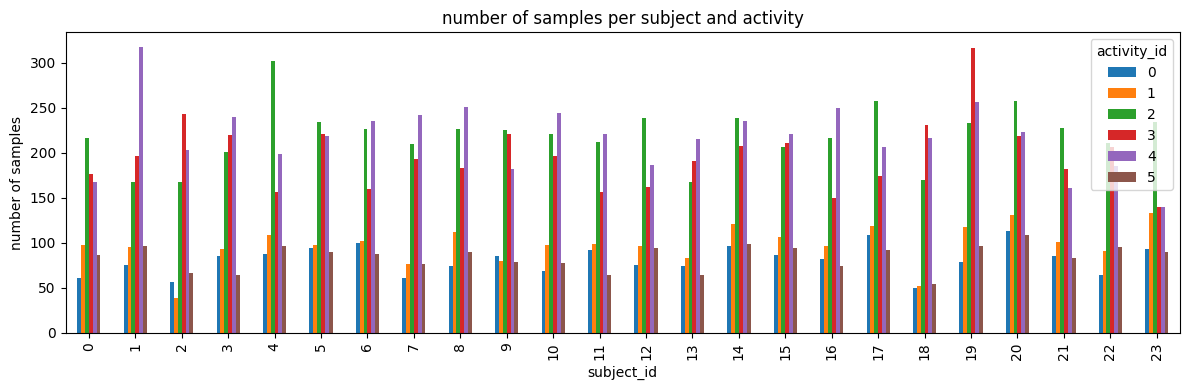

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 3, Subject: 2')

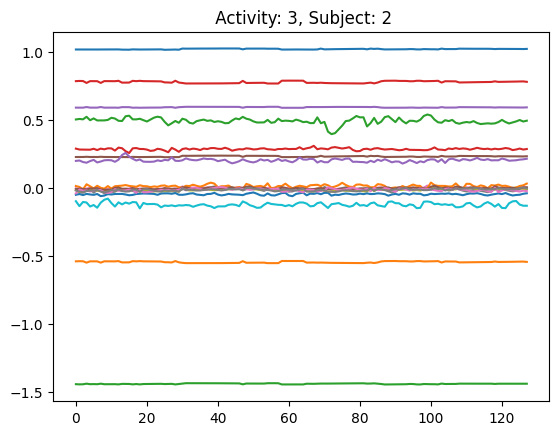

In [8]:
subject_id = 2
activity_id = 3

# index as ra
batch = loader.sample_triples(1, activity_id=activity_id, subject_id=subject_id)
ya, ys, (x,) = batch[0]

plt.plot(x)
plt.title(f" Activity: {ya}, Subject: {ys}")